<a id='Index'></a>

# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center"> Index </h1></span>

Section List

<a href='#Import-Libraries'> 1. Import Libraries + Settings</a>

<a href='#Load-Data'> 2. Load Data </a>

<a href='#Split-Data'> 3. Splitting Data into Training and Testing Sets </a>

<a href='#Write-Data'> 4. Writing Data into Training and Testing Files </a>



<a id='Import-Libraries'></a>
# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center"> Import Libraries </h1></span>
<a href='#Index'> Back to Index</a>

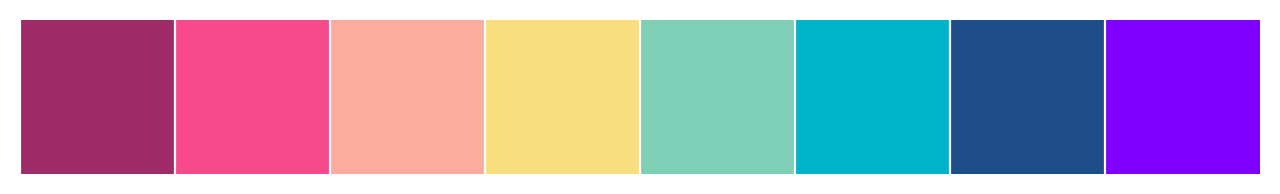

In [1]:
# read raw input
from scipy.io.arff import loadarff 

# dataframe manipulation
import pandas as pd 
import numpy as np
import re

# text feature extraction
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import defaultdict
import datetime

# plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# other stuff
import os
import csv
import random
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

np.random.seed(888) # set seed to split data into training and testing later.

# set stype
plt.style.use("seaborn-darkgrid")
%config InlineBackend.figure_format = 'retina'
my_palette = ['#9F2B68', '#f64a8a', '#fdab9f', '#F8DE7E', '#7dcfb6', '#00b2ca', '#1d4e89', '#7F00FF'] 
sns.set_palette(palette=my_palette)
sns.palplot(sns.color_palette(my_palette))

<a id='Load-Data'></a>
# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center"> Loading Data </h1></span>
<a href='#Index'> Back to Index</a>

In [2]:
### Load data and make a Dataframe 
DATA_PATH = 'datasets/default_of_credit_card_clients.arff'

data, metadata = loadarff(DATA_PATH)
# convert last value from byte to int
data = pd.DataFrame(data)
data['label'] = data['y'].apply(lambda x: int(x.decode('UTF-8')))
data.drop(columns=['y', 'id'], inplace=True)

In [4]:
print(data.shape)
data.describe()

(30000, 24)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x15,x16,x17,x18,x19,x20,x21,x22,x23,label
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
data.label.value_counts()

0    23364
1     6636
Name: label, dtype: int64

<a id='Split-Data'></a>
# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center"> Splitting Data into Training and Testing Datasets </h1></span>
<a href='#Index'> Back to Index</a>

In [11]:
# splitting data into training and (hidden) test sets. There are 30_000 so we arbitrarily use 3000 for testing
test_idx = np.random.choice(range(data.shape[0]), size=3000, replace=False)
test_df = data.iloc[test_idx,:]
train_df = data.drop(test_idx, axis=0)
print(f'train_df shape {train_df.shape}, test_df.shape {test_df.shape}')
display(train_df.head())

train_df shape (27000, 24), test_df.shape (3000, 24)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x15,x16,x17,x18,x19,x20,x21,x22,x23,label
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [13]:
data.label.value_counts()

0    23364
1     6636
Name: label, dtype: int64

<a id='Write-Data'></a>
# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center"> Writing Data into Training and Testing Files </h1></span>
<a href='#Index'> Back to Index</a>

In [12]:
PATH = "datasets/processed/credit_card"
train_df.to_csv(os.path.join(PATH, 'train.csv'), index=False)
test_df.to_csv(os.path.join(PATH, 'test.csv'), index=False)


In [15]:
test_df.label.value_counts()

0    2303
1     697
Name: label, dtype: int64